# predicting-customer-buying-behaviour

Use the "Run" button to execute the code.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn --quiet

In [2]:
!pip install xgboost --quiet

In [3]:
!pip install imbalanced-learn --quiet

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [5]:
df = pd.read_csv("customer_booking.csv", encoding = "ISO-8859-1" )

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
num_passengers,2,1,2,1,2,1,3,2,1,1
sales_channel,Internet,Internet,Internet,Internet,Internet,Internet,Internet,Internet,Internet,Mobile
trip_type,RoundTrip,RoundTrip,RoundTrip,RoundTrip,RoundTrip,RoundTrip,RoundTrip,RoundTrip,RoundTrip,RoundTrip
purchase_lead,262,112,243,96,68,3,201,238,80,378
length_of_stay,19,20,22,31,22,48,33,19,22,30
flight_hour,7,3,17,4,15,20,6,14,4,12
flight_day,Sat,Sat,Wed,Sat,Wed,Thu,Thu,Mon,Mon,Sun
route,AKLDEL,AKLDEL,AKLDEL,AKLDEL,AKLDEL,AKLDEL,AKLDEL,AKLDEL,AKLDEL,AKLDEL
booking_origin,New Zealand,New Zealand,India,New Zealand,India,New Zealand,New Zealand,India,New Zealand,India
wants_extra_baggage,1,0,1,0,1,1,1,1,0,0


In [7]:
df.shape

(50000, 14)

### Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

 -   `num_passengers` = number of passengers travelling
 -   `sales_channel` = sales channel booking was made on
 -   `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
 -   `purchase_lead` = number of days between travel date and booking date
 -   `length_of_stay` = number of days spent at destination
 -   `flight_hour` = hour of flight departure
 -   `flight_day` = day of week of flight departure
 -   `route` = origin -> destination flight route
 -   `booking_origin` = country from where booking was made
 -   `wants_extra_baggage` = if the customer wanted extra baggage in the booking
 -   `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
 -   `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
 -   `flight_duration` = total duration of flight (in hours)
 -   `booking_complete` = flag indicating if the customer completed the booking


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [10]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Before we compute any statistics on the data, lets do any necessary data conversion

In [12]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [13]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

In [14]:
#df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [16]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [17]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [18]:
df["route"].nunique()

799

In [19]:
df["booking_origin"].nunique()

104

In [20]:
numeric_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

In [21]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

### Encoding categorical data

Changing `object` dtype to `int` dtype

In [22]:
df.select_dtypes("object").head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [23]:
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()

In [24]:
df.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

### Scaling numeric features

In [25]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [26]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [27]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.125,0,0,0.302191,0.024422,0.304348,0,0,0,1.0,0.0,0.0,0.175983,0
1,0.000,0,0,0.129181,0.025707,0.130435,0,0,0,0.0,0.0,0.0,0.175983,0
2,0.125,0,0,0.280277,0.028278,0.739130,1,0,1,1.0,1.0,0.0,0.175983,0
3,0.000,0,0,0.110727,0.039846,0.173913,0,0,0,0.0,0.0,1.0,0.175983,0
4,0.125,0,0,0.078431,0.028278,0.652174,1,0,1,1.0,0.0,1.0,0.175983,0


### Make a new feature

Because we want to know customer behavior to have a trip on holiday (weekend), so let's make a feature called is_weekend. if the flight day is Saturday or Sunday we give is_weekend value = 1, for another flight day we give it 0

In [28]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,0.125,0,0,0.302191,0.024422,0.304348,0,0,0,1.0,0.0,0.0,0.175983,0,0
1,0.000,0,0,0.129181,0.025707,0.130435,0,0,0,0.0,0.0,0.0,0.175983,0,0
2,0.125,0,0,0.280277,0.028278,0.739130,1,0,1,1.0,1.0,0.0,0.175983,0,0
3,0.000,0,0,0.110727,0.039846,0.173913,0,0,0,0.0,0.0,1.0,0.175983,0,0
4,0.125,0,0,0.078431,0.028278,0.652174,1,0,1,1.0,0.0,1.0,0.175983,0,0


### Mutual Information

In [29]:
x= df.drop('booking_complete', axis=1)

In [30]:
y= df.booking_complete

In [31]:
x.dtypes

num_passengers           float64
sales_channel              int64
trip_type                  int64
purchase_lead            float64
length_of_stay           float64
flight_hour              float64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage      float64
wants_preferred_seat     float64
wants_in_flight_meals    float64
flight_duration          float64
is_weekend                 int64
dtype: object

In [32]:
from sklearn.feature_selection import mutual_info_classif

In [33]:
mutual_info_scores = mutual_info_classif(x, y)

In [34]:
mutual_info_scores = pd.Series(mutual_info_scores, name = "Mutual Info Scores", index = x.columns)

In [35]:
mutual_info_scores.sort_values(ascending = False)

route                    0.052901
booking_origin           0.049884
flight_duration          0.017566
wants_extra_baggage      0.008492
length_of_stay           0.007082
wants_in_flight_meals    0.005977
wants_preferred_seat     0.003246
flight_hour              0.002960
flight_day               0.002006
num_passengers           0.001062
sales_channel            0.000675
purchase_lead            0.000473
trip_type                0.000000
is_weekend               0.000000
Name: Mutual Info Scores, dtype: float64

In [36]:
def plot_mutual_info_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

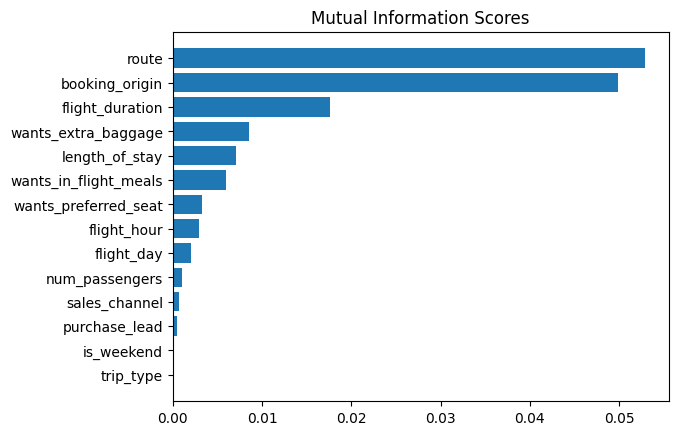

In [37]:
plot_mutual_info_scores(mutual_info_scores)

We can see `route`, `booking_origin`, `flight_duration`, `length_of_stay`, `wants_extra_baggage` are the top 5 features which are dependent with `booking_complete` feature.

### Correlation between variables

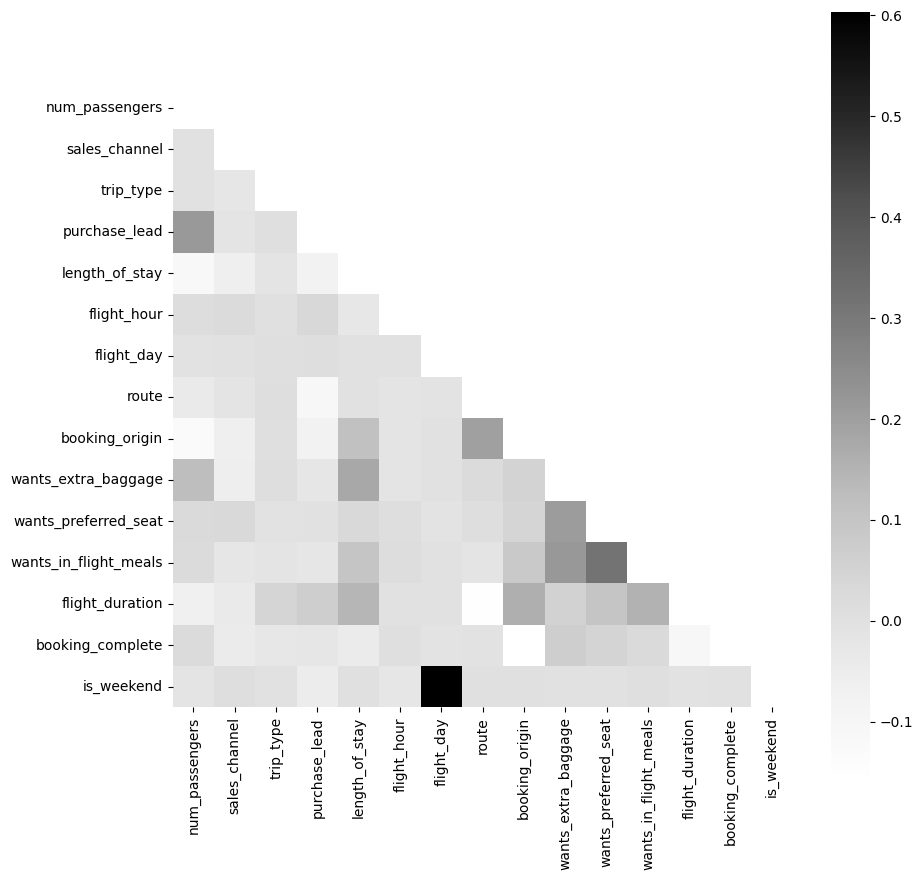

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, cmap='Greys',
            mask = np.triu(np.ones_like(df.corr(), dtype='bool')));

### Splitting Dataset

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

In [42]:
x_train.shape

(30000, 14)

In [43]:
y_train.shape

(30000,)

In [44]:
x_val.shape

(10000, 14)

In [45]:
y_val.shape

(10000,)

In [46]:
x_test.shape

(10000, 14)

In [47]:
y_test.shape

(10000,)

### Balancing Training Dataset

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:
#?SMOTE

In [50]:
y_train.value_counts()

0    25502
1     4498
Name: booking_complete, dtype: int64

In [51]:
# using imblearn to removing imbalance in our dataset

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smote = SMOTE()
x_train_smt, y_train_smt = smote.fit_resample(x_train, y_train)
#X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_smt)
print('After',counter)

Before Counter({0: 25502, 1: 4498})
After Counter({0: 25502, 1: 25502})


### Training with Random Forest model

We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [53]:
model_1 = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state = 42` ensures that the we get the same results for each execution.

In [54]:
%%time
model_1.fit(x_train_smt, y_train_smt)

CPU times: user 9.89 s, sys: 105 ms, total: 9.99 s
Wall time: 5.52 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
model_1.score(x_train_smt, y_train_smt)

0.9999019684730609

In [56]:
model_1.score(x_val, y_val)

0.8408

In [57]:
preds_1= model_1.predict(x_val)

In [58]:
print('ACCURACY: ',accuracy_score(y_val, preds_1)*100)
#print("Accuracy: {:.2f}%".format(accuracy * 100))

ACCURACY:  84.08


In [59]:
print('AUC score: ',roc_auc_score(y_val, preds_1))

AUC score:  0.5710315949752569


In [60]:
confusion_matrix(y_val, preds_1, normalize='true')

array([[0.95422535, 0.04577465],
       [0.81216216, 0.18783784]])

Random Forests also assign an `"importance"` to each `feature`, by combining the importance values from individual trees.

In [61]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_1.feature_importances_
}).sort_values('importance', ascending=False)

In [62]:
importance_df.head(10)

,feature,importance
8,booking_origin,0.127028
0,num_passengers,0.123568
4,length_of_stay,0.107001
7,route,0.096770
3,purchase_lead,0.094878
9,wants_extra_baggage,0.091088
5,flight_hour,0.087895
12,flight_duration,0.067629
11,wants_in_flight_meals,0.065115
10,wants_preferred_seat,0.063094


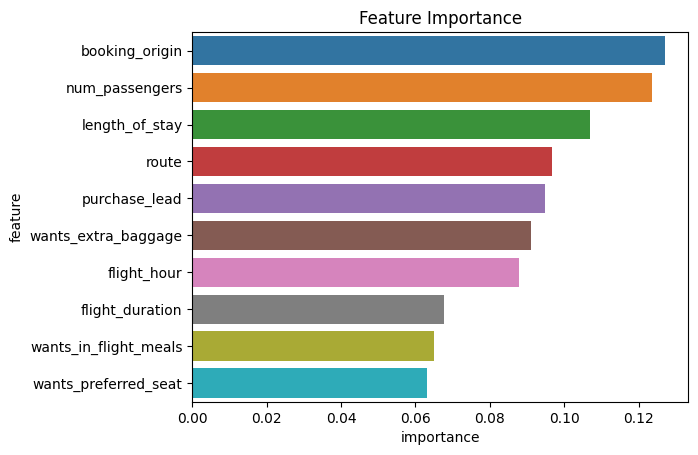

In [63]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning with Random Forests

In [64]:
#?RandomForestClassifier

Let's create a base model with which we can compare models with tuned hyperparameters.

In [65]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train_smt, y_train_smt)

In [66]:
base_train_acc = base_model.score(x_train_smt, y_train_smt)
base_val_acc = base_model.score(x_val, y_val)

In [67]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999019684730609, 0.8408)

We can use this as a benchmark for hyperparmeter tuning.

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

#### 200 estimators

In [68]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [69]:
model.fit(x_train_smt, y_train_smt)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [70]:
model.score(x_train_smt, y_train_smt), model.score(x_val, y_val)

(0.9999019684730609, 0.8421)

In [71]:
base_accs

(0.9999019684730609, 0.8408)

#### 250 estimators

In [72]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=250)

In [73]:
model.fit(x_train_smt, y_train_smt)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

In [74]:
model.score(x_train_smt, y_train_smt), model.score(x_val, y_val)

(0.9999019684730609, 0.8408)

In [75]:
base_accs

(0.9999019684730609, 0.8408)

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting.

Let's define a helper function test_params to make it easy to test hyperparameters.

In [76]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train_smt, y_train_smt)
    return model.score(x_train_smt, y_train_smt), model.score(x_val, y_val)

Let's test a few values of `max_depth` and `max_leaf_nodes`.

In [77]:
test_params(max_depth=35)

(0.9999019684730609, 0.8413)

In [78]:
test_params(max_depth=40)

(0.9999019684730609, 0.8404)

In [79]:
test_params(max_leaf_nodes=2**10)

(0.9251039134185554, 0.833)

In [80]:
test_params(max_leaf_nodes=2**20)

(0.9999019684730609, 0.8419)

In [81]:
base_accs # no max depth or max leaf nodes

(0.9999019684730609, 0.8408)

The optimal values of `max_depth` and `max_leaf_nodes` lies somewhere between 0 and unbounded.

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

In [82]:
test_params(max_features='log2')

(0.9999019684730609, 0.8408)

In [83]:
test_params(max_features=3)

(0.9999019684730609, 0.8408)

In [84]:
test_params(max_features=4)

(0.9999019684730609, 0.8379)

In [85]:
base_accs

(0.9999019684730609, 0.8408)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [86]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9790800721512039, 0.8419)

In [87]:
test_params(min_samples_split=2, min_samples_leaf=1)

(0.9999019684730609, 0.8408)

In [88]:
base_accs

(0.9999019684730609, 0.8408)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [89]:
test_params(min_impurity_decrease=1e-12)

(0.9998823621676731, 0.8403)

In [90]:
test_params(min_impurity_decrease=1e-14)

(0.9998823621676731, 0.8403)

In [91]:
base_accs

(0.9999019684730609, 0.8408)

### `bootstrap`, `max_samples`

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [92]:
test_params(bootstrap=False)

(0.9999019684730609, 0.8394)

In [93]:
base_accs

(0.9999019684730609, 0.8408)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [94]:
test_params(max_samples=0.9)

(0.9998627558622853, 0.8379)

In [95]:
base_accs

(0.9999019684730609, 0.8408)

### `class_weight`

In [96]:
model.classes_

array([0, 1])

In [97]:
test_params(class_weight='balanced')

(0.9999019684730609, 0.8408)

In [98]:
test_params(class_weight={0: 1, 1: 5})

(0.9999019684730609, 0.8419)

In [99]:
base_accs

(0.9999019684730609, 0.8408)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [100]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=200,
                               max_features=4,
                               max_depth=35,
                               class_weight={0: 1, 1: 5})

In [101]:
model.fit(x_train_smt, y_train_smt)

RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=35, max_features=4,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [102]:
model.score(x_train_smt, y_train_smt), model.score(x_val, y_val)

(0.9998823621676731, 0.8408)

In [103]:
base_accs

(0.9999019684730609, 0.8408)

We've increased the accuracy to 85.7% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning.

This could be due to any of the following reasons:

- We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

- We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

- We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

- We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

- Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.  

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrong.